# LungAI 🫁 - Software de Apoyo para Detección Precoz de Cáncer de Pulmón

### **Software AI para Detección de Cáncer de Pulmón**

Esta plataforma es una herramienta avanzada impulsada por inteligencia artificial (IA) diseñada para asistir a médicos en la detección y análisis de cáncer de pulmón a partir de imágenes de tomografías computarizadas (CT-Scans). Combina modelos de aprendizaje profundo con visualización de mapas de calor (Grad-CAM) para identificar posibles áreas de interés, y permite generar informes profesionales con predicciones y observaciones.

#### Características principales

### 1. **Clasificación de imágenes con IA**
   - Suba imágenes de tomografías computarizadas (CT-Scans) para su análisis.
   - La IA determina si hay presencia de cáncer con un porcentaje de confianza asociado.
   - Resultados rápidos y fáciles de interpretar para apoyar en la toma de decisiones.

### 2. **Generación de informes médicos**
   - Los médicos pueden añadir observaciones y comentarios personalizados.
   - Descargue informes detallados en formato PDF para registro o comunicación con otros especialistas.

### 3. **Propósito educativo y diagnóstico**
   - **Educativo:** Diseñada para demostrar el potencial de la IA en el análisis de imágenes médicas.
   - **Diagnóstico:** Soporte para médicos, no reemplaza la evaluación clínica ni los estudios profesionales.

### Próximos pasos: **Identificación de Tumores con Grad-CAM**
   - Visualice mapas de calor generados por Grad-CAM para localizar áreas relevantes en la imagen que influyen en la predicción del modelo.
   - Ayuda a los médicos a comprender mejor los resultados del modelo y a evaluar posibles regiones tumorales.

## Bibliotecas

In [1]:
# Modificación de carpetas del ordenador
import os

# Balanceo y preprocesamiento de imágenes
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Procesa imágenes antes de entrenar el modelo y ayuda a que entrene más rápido y sea más estable
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from PIL import Image

# Deep Learning - Computer Vision
import tensorflow as tf # Biblioteca para crear y entrenar redes neuronales
from tensorflow.keras.applications import VGG16  # Modelo preentrenado en un conjunto de datos muy grande (ImageNet) para clasificación de imágenes
from tensorflow.keras.models import Sequential # Crea un modelo en Keras donde las capas se apilan una detrás de otra (modelo "lineal")
from tensorflow.keras.applications import ResNet50 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam # Método de optimización que ajusta cómo el modelo aprende durante el entrenamiento



2024-12-27 18:46:36.726636: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- **Dense**: Es una capa completamente conectada, donde cada neurona se conecta con todas las neuronas de la capa anterior.
- **GlobalAveragePooling2D**: Es una capa que reduce las dimensiones de salida del modelo base para hacerlas manejables.
- **Dropout**: Es una técnica para evitar que el modelo memorize los datos, llamada "sobreajuste".

## Preparación de las imágenes médicas

### Antecedentes

Las imágenes con las que será entrenado el modelo se han descargado de "Chest CT-Scan images Dataset" de Kaggle. En este dataset las imágenes vienen divididas en las carpetas de test, train y valid, y a su vez, cada una de estas carpetas contiene las siguientes subcarpetas:

- **Adenocarcinoma de pulmón**: El adenocarcinoma de pulmón es la forma más común de cáncer de pulmón, representando el 30% de todos los casos en general y aproximadamente el 40% de todas las ocurrencias de cáncer de pulmón de células no pequeñas (NSCLC, por sus siglas en inglés). Los adenocarcinomas se encuentran en varios tipos comunes de cáncer, incluidos los de mama, próstata y colorrectal. Los adenocarcinomas de pulmón se localizan en la región externa del pulmón, en glándulas que secretan moco y nos ayudan a respirar. Los síntomas incluyen tos, ronquera, pérdida de peso y debilidad.

- **Carcinoma de células grandes**: El carcinoma indiferenciado de células grandes es un cáncer de pulmón que crece y se disemina rápidamente, y puede encontrarse en cualquier parte del pulmón. Este tipo de cáncer de pulmón suele representar entre el 10% y el 15% de todos los casos de NSCLC. El carcinoma indiferenciado de células grandes tiende a crecer y extenderse rápidamente.

- **Carcinoma de células escamosas**: Este tipo de cáncer de pulmón se encuentra en la zona central del pulmón, donde los bronquios más grandes se unen con la tráquea o en una de las principales ramas de las vías respiratorias. El cáncer de pulmón de células escamosas es responsable de aproximadamente el 30% de todos los cánceres de pulmón de células no pequeñas y generalmente está asociado al tabaquismo.

- **Imágenes normales de tomografías computarizadas (CT-Scan)**.

### Renombrar imágenes, crear carpeta de cáncer y mover las imágenes a dicha carpeta.

Como el objetivo es tener dentro de las carpetas train, test y valid, las subcarpetas de cáncer o normal, es necesario agrupar todas las imágenes de los diferentes cánceres en una misma carpeta y mantener la carpeta con las imágenes normales. Para ello:

- Renombramos las imágenes para que no se sobreescriban unas con otras al moverlas de las carpetas de adenocarcinoma, large cell carcinoma y squamous cell carcinoma.
- Creamos las carpetas cancer para carpeta train, valid y test usando os.makedirs con exist_ok=True.
- Movemos las imágenes desde sus carpetas de origen a la carpeta destino (cancer), mediante shutil.move para mover cada archivo desde su carpeta de origen a la carpeta cancer.

## Balanceo de las clases 'normal' y 'cancer'

Al ejecutar el código anterior quedaba en evidencia que las clases están muy desbalanceadas, habiendo casi el triple de imágenes de cáncer que normal. Para solucionar este problema había dos opciones:
- Aumentar los datos para balancear las clases, generando más imágenes sintéticas para la clase minoritaria (normal) usando técnicas de aumentación de datos como rotaciones, espejado, zoom, etc.
- Agregar más datos de la clase normal desde otras fuente para mejorar el balance.

En este caso, se opta por la segunda opción; se descarga la carpeta con imágenes de pulmones normales (400 imágenes) de la fuente de Kaggle "The IQ-OTH/NCCD lung cancer dataset". Estas imágenes se distribuyen respetando la proporción típica para datasets:
- 70% para train (entrenamiento): ~280 imágenes.
- 15% para valid (validación): ~60 imágenes.
- 15% para test (prueba): ~60 imágenes.

Confirmamos que todas las imágenes están correctamente distribuidas en las carpetas cancer y normal. 

Podemos ver que hay un desajuste en las proporciones entre las clases 'valid' y 'test'. Para balancear las clases redistribuimos las imágenes entre las carpetas:
- Mantenemos una proporción equilibrada entre las clases cancer y normal en todos los conjuntos (train, valid, test).
- Usamos proporciones similares a las del conjunto de entrenamiento, donde hay una distribución casi 50/50.

Para ello, especificamente:
- Reducimos el exceso de imágenes normal en valid moviéndolas a train.
- Aumentamos el número de imágenes cancer en valid moviéndolas desde test.

Iteramos en este proceso hasta conseguir un número equilibrado de imágenes entre carpetas (cancer / normal) y subcarpetas (test / train / valid).

Si bien la distribución de imágenes en train es bastante equilibrada, los conjuntos de valid y test necesitan un ajuste adicional para lograr un mejor balance. En este caso, utilizaremos aumentación de datos para contrarrestar el desequilibrio.

## Generación de imágenes con Data Augmentation

Chequeamos que las imágenes estén balancedas

In [4]:
dataset_path = "/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/Semana_9/Proyecto_final/LungAI/Datasets/Chest CT-Scan images Dataset/Resized_Images"
datasets = ['train', 'valid', 'test']
categories = ['cancer_resized', 'normal_resized']

# Contamos imágenes 
for dataset in datasets:
    print(f"\nConjunto: {dataset}")
    for category in categories:
        category_path = os.path.join(dataset_path, dataset, category)
        if os.path.exists(category_path):
            num_images = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
            print(f"  - {category}: {num_images} imágenes")
        else:
            print(f"  - {category}: Carpeta no encontrada")


Conjunto: train
  - cancer_resized: 437 imágenes
  - normal_resized: 439 imágenes

Conjunto: valid
  - cancer_resized: 115 imágenes
  - normal_resized: 115 imágenes

Conjunto: test
  - cancer_resized: 177 imágenes
  - normal_resized: 191 imágenes


## Preprocesamiento de las imágenes

### Redimensionamiento de las imágenes
Las imágenes deben tener un tamaño consistente, ya que los modelos de Deep Learning requieren una entrada de tamaño uniforme. El tamaño dependerá del modelo a utilizar; en el caso de CNN - Redes Neuronales Convolucionales, un tamaño común es de 224x224 píxeles.

###  Normalización de las imágenes
La normalización es el proceso de escalar los valores de los píxeles de las imágenes para que estén en un rango más manejable, típicamente entre 0 y 1. Esto se hace dividiendo cada valor de píxel por 255 (ya que los valores de los píxeles en imágenes RGB están en el rango de 0 a 255).

Como este paso implicaría guardar nuevas imágenes, se puede hacer la normalización durante la carga para entrenamiento, en el generador de datos de Keras al cargar las imágenes para el modelo. Este método es más eficiente ya que evita el paso de guardar nuevas imágenes normalizadas.

### Verificar y limpiar las imágenes

Revisamos que todas las imágenes en las carpetas de train, valid y test sean válidas, eliminando cualquier archivo corrupto o no relacionado.

### Eliminar archivos no relacionados

Eliminamos archivos que no sean imágenes (como .txt, .DS_Store, etc.) de las carpetas del dataset.

## Creación del modelo

El modelo que crearemos para la clasificación de imágenes tiene las siguientes características: 
- Red Neuronal Convolucional: La opción más adecuada para trabajar con imágenes es una red neuronal convolucional (CNN).
- Transfer Learning: Utilizaremos un modelo preentrenado, que es lo más común y efectivo.

### Transfer Learning: Elección de modelo base

En primer lugar se entrenó el modelo con VGG16, obteniendo resultados con precisión baja (aprox. 50%). Se decide cambiar a ResNet50 porque:
- Más profunda y resuelve problemas de aprendizaje en redes profundas (gradiente desvanecido).
- Más eficiente computacionalmente con menos parámetros.
- Generaliza mejor a problemas complejos y tiene un mejor desempeño en benchmarks.
- Facilita interpretaciones útiles, como mapas Grad-CAM, en imágenes médicas.

En resumen, ResNet50 es una opción más adecuada para proyectos que requieren precisión, eficiencia y capacidad de aprendizaje en problemas complejos como la detección de cáncer en imágenes médicas.

## Modelo base: ResNet50

ResNet50 es una red neuronal profunda que utiliza conexiones residuales para evitar la degradación del desempeño en redes profundas. Con 50 capas, es eficiente en tareas de visión por computadora, como clasificación de imágenes, y se beneficia de modelos preentrenados en grandes bases de datos como ImageNet, facilitando su uso en aplicaciones específicas.

En el contexto de modelos preentrenados como ResNet50, uno de los desafíos al utilizar herramientas como Grad-CAM es la dificultad para acceder a las capas internas del modelo debido a su estructura. Grad-CAM (Gradient-weighted Class Activation Mapping) es una técnica de visualización que se utiliza para identificar qué partes de una imagen influyen más en la predicción de una red neuronal. Sin embargo, para poder aplicar esta técnica, es necesario **acceder a las activaciones de las capas intermedias (como las capas convolucionales) y los gradientes correspondientes**.

ResNet50 es un modelo preentrenado basado en una arquitectura residual profunda. Al usar un modelo preentrenado como ResNet50, este se suele encapsular dentro de un modelo secuencial o funcional, lo que dificulta el acceso directo a las capas internas. En modelos secuenciales, las capas están organizadas de manera que no siempre es sencillo obtener las salidas de capas intermedias sin modificar la estructura del modelo. Además, si el modelo base está encapsulado dentro de otro modelo funcional, también puede resultar complicado acceder a las activaciones deseadas.

Para resolver este problema y habilitar el uso de herramientas como Grad-CAM, la estrategia propuesta consiste en **integrar explícitamente la entrada (input_tensor) en el modelo preentrenado al momento de definirlo**. Esto implica que el modelo se construye de tal manera que las capas intermedias, en particular aquellas de interés para Grad-CAM, sean accesibles. Esta integración se logra **conectando directamente las salidas de las capas internas a analizar**. De esta forma, el modelo no se limita a ser secuencial y se permite el acceso a las activaciones de las capas intermedias.

La solución técnica adicional incluye "aplanar" el modelo, lo que significa **exponer explícitamente las entradas y las salidas de las capas intermedias, sin que estas queden encapsuladas en una red funcional compleja**. Esto se logra reestructurando el flujo del modelo de modo que se pueda obtener información de capas específicas para luego aplicar Grad-CAM o cualquier otra técnica de visualización de activaciones.

Al hacerlo, se facilita el acceso a las capas internas y se establece una forma de extraer las activaciones necesarias, lo que permite el uso de Grad-CAM para interpretar y visualizar qué características de la imagen son relevantes para la predicción del modelo, mejorando la interpretabilidad del modelo y permitiendo una mayor comprensión de su comportamiento.

Construimos un modelo basado en ResNet50 preentrenado para realizar clasificación binaria, permitiendo **ajustes finos (fine-tuning)** y configurando un modelo intermedio para herramientas como Grad-CAM:

- **Definimos el modelo base (pretrained_model)**: Incluimos explícitamente la entrada mediante input_tensor=inputs, lo que asegura que podemos acceder a las capas internas directamente, como conv5_block3_out.
- **Configuramos un modelo intermedio (intermediate_model)**: Este modelo es crucial para Grad-CAM. Permite extraer tanto la salida de una capa específica como la salida final del modelo, lo que facilita la creación del mapa de calor.
- **Eliminamos problemas de encapsulación**: La estructura funcional evita los problemas de accesibilidad que ocurren al usar un modelo secuencial.

In [5]:
# Definimos la entrada del modelo como imágenes de tamaño 224x224 con 3 canales (RGB).
inputs = Input(shape=(224, 224, 3))

# Modelo base con ResNet50
pretrained_model = ResNet50(
    weights='imagenet',  # Utiliza los pesos preentrenados del conjunto de datos ImageNet
    include_top=False, # Excluye las capas completamente conectadas del modelo original, dejando solo la parte convolucional. (???)
    input_tensor=inputs,  # Conecta la entrada definida previamente con la arquitectura de ResNet50
    pooling='avg' # Aplica una capa de global average pooling para convertir el tensor de características en un vector
)

# Congelar y descongelar capas del modelo base
# Aplicamos fine-tuning, combinando características generales de ImageNet con la especialización de la tarea actual
pretrained_model.trainable = True # Ajusta (entrena) el modelo base.
fine_tune_at = 50  #  Descongela las capas desde la capa 50 en adelante para permitir que se entrenen
# Congela las primeras 50 capas del modelo base para conservar el conocimiento aprendido en ImageNet
# Mientras que las capas superiores (más especializadas) se ajustan para la clasificación de imágenes
for layer in pretrained_model.layers[:fine_tune_at]:  
    layer.trainable = False

# Agregar capas densas adicionales
x = Dense(128, activation='relu')(pretrained_model.output) # Añade una capa totalmente conectada con 128 neuronas y activación ReLU
x = Dense(256, activation='relu')(x) # Añade otra capa densa con 256 neuronas
x = Dropout(0.5)(x) # Desactiva aleatoriamente el 50% de las neuronas durante el entrenamiento para evitar el sobreajuste
outputs = Dense(1, activation='sigmoid')(x) # Capa de salida con una neurona y activación sigmoide para clasificación binaria

# Crear el modelo final
model = Model(inputs=inputs, outputs=outputs) # Combina la entrada y salida definidas para formar el modelo completo

# Crear un modelo intermedio para Grad-CAM

# Este modelo intermedio es esencial para Grad-CAM, ya que requiere tanto activaciones de una capa convolucional como los gradientes
# Aquí seleccionamos explícitamente:
#  - Las activaciones de la capa convolucional conv5_block3_out (la última capa convolucional de ResNet50)
#  - La salida final del modelo (predicción binaria).
intermediate_model = Model(
    inputs=[model.input],
    outputs=[pretrained_model.get_layer('conv5_block3_out').output, model.output] 
)

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),  # Usa el optimizador Adam con una tasa de aprendizaje baja (0.00005) para un ajuste fino controlado
              loss='binary_crossentropy',  # Función de pérdida para problemas de clasificación binaria
              metrics=['accuracy']) # Métrica para evaluar el rendimiento del modelo.


# Resumen del modelo
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,883,265 (91.11 MB)

 Trainable params: 23,222,657 (88.59 MB)

 Non-trainable params: 660,608 (2.52 MB)

# Preparación de los generadores de datos

Configuramos tres generadores de datos para entrenar, validar y probar un modelo de detección de cáncer de pulmón. 

Utilizaremos data augmentation para el conjunto de entrenamiento para aumentar la diversidad de las imágenes y prevenir el sobreajuste, mientras que los conjuntos de validación y prueba se mantienen sin modificaciones. 

Además, normalizamos las imágenes y aseguramos que todas tengan el mismo tamaño antes de ser alimentadas al modelo.


#### Data Augmentation Avanzada

El data augmentation debe aplicarse al crear el generador de datos de entrenamiento. Esto aumenta la diversidad de las imágenes de entrenamiento mediante transformaciones como rotaciones, desplazamientos y flips.

**El data augmentation no cambia el número total de imágenes en las carpetas porque las transformaciones se aplican dinámicamente durante el entrenamiento. Por eso, los generadores siguen reportando las mismas cantidades que tienes físicamente almacenadas en las carpetas.*

In [10]:
# Generador de datos con Data Augmentation avanzado
# ImageDataGenerator de Keras para generar lotes de imágenes de entrenamiento con transformaciones en tiempo real
# Modificando las imágenes a medida que se cargan para entrenar el modelo, lo que mejora la generalización y reduce el sobreajuste (overfitting)

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normaliza valores de píxeles de imágenes - inicialmente están en [0, 255]-a [0, 1] para facilitar entrenamiento del modelo
    rotation_range=20,          # Rotar imágenes hasta 20 grados para aumentar la variabilidad de los datos
    width_shift_range=0.2,      # Desplazamiento horizontal hasta 20% del ancho original
    height_shift_range=0.2,     # Desplazamiento vertical hasta 20% de la altura original
    shear_range=0.2,            # Transformaciones de cizalla, cambia la forma de manera no uniforme, imitando deformaciones
    zoom_range=0.2,             # Zoom aleatorio hasta 20%
    horizontal_flip=True,       # Invertir imágenes horizontalmente
    fill_mode='nearest'         # Método de relleno para píxeles fuera del borde
)

# Generador de validación y prueba sin Data Augmentation:
# Los generadores para validación y prueba NO usan data augmentation (modificación de datos)
# Esto es porque queremos evaluar el rendimiento del modelo en datos que reflejan más fielmente cómo se verá el mundo real

valid_test_datagen = ImageDataGenerator(rescale=1./255) # Normalización (escalar los píxeles a un rango [0, 1])
# No se aplican transformaciones adicionales como rotaciones o desplazamientos. 
# Esto asegura que las imágenes de validación y prueba no sean alteradas para que las evaluaciones sean representativas de un caso real.

# Creación de los generadores
# Se crean tres generadores específicos para los conjuntos de entrenamiento, validación y prueba

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),  # Ruta al directorio donde se encuentran las imágenes de entrenamiento
    target_size=(224, 224),               # Redimensiona imágenes a 224x224 píxeles, tamaño esperado por ResNet50
    batch_size=32,                        # Número de imágenes a procesar en cada iteración durante el entrenamiento
    class_mode='binary'                   # El modelo realiza una clasificación binaria
)

# 4. Generadores para validación y prueba:
# Se configuran de manera similar, pero sin transformaciones adicionales

valid_generator = valid_test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = valid_test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Importante: Mantén el orden en los datos de prueba*
)

# * En el generador de prueba es importante asegurar que las imágenes en el conjunto de prueba no se mezclarán
# Util para mantener un orden predecible durante la evaluación del modelo, ya que es necesario comparar las predicciones con las etiquetas originales en el mismo orden.

Found 876 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 368 images belonging to 2 classes.


# Entrenamiento del modelo

#### **Scheduler**
El scheduler se añade como un callback en TensorFlow al momento de entrenar el modelo. Esto asegura que la tasa de aprendizaje se ajuste dinámicamente según el desempeño del modelo en los datos de validación.

En concreto, este callback de Keras ajusta automáticamente la tasa de aprendizaje (learning rate) durante el entrenamiento si la métrica de monitoreo (val_loss) no mejora después de un número determinado de épocas. Es útil para evitar que el modelo se estanque en un mínimo local, ayudando a mejorar el rendimiento del modelo cuando la tasa de aprendizaje es demasiado alta o está desajustada.

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback para reducir la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(    
    monitor='val_loss',  # Métrica que se monitorea  
    factor=0.1,          # Multiplicador para reducir la tasa de aprendizaje
    patience=2,          # Número de épocas sin mejora para reducir lr
    min_lr=1e-6          # Límite inferior de la tasa de aprendizaje
)

Más en detalle:

- **monitor='val_loss'**: Esta es la métrica que se va a monitorear para decidir cuándo reducir la tasa de aprendizaje. En este caso, se monitorea la pérdida de validación (val_loss). Si val_loss no mejora, el callback activará la reducción de la tasa de aprendizaje.

- **factor=0.1**: El factor de reducción de la tasa de aprendizaje. En este caso, cuando se activa el callback (es decir, cuando la métrica monitoreada no mejora después de patience épocas), la tasa de aprendizaje se reducirá multiplicándola por 0.1. Esto significa que la tasa de aprendizaje será reducida a un 10% de su valor actual.

- **patience=2**: Este parámetro define el número de épocas consecutivas sin mejora en la métrica monitoreada (en este caso, la pérdida de validación) antes de que se reduzca la tasa de aprendizaje. Es decir, si la pérdida de validación no mejora en 2 épocas consecutivas, el callback reducirá la tasa de aprendizaje.

- **min_lr=1e-6**: Este es el valor mínimo que puede alcanzar la tasa de aprendizaje. Si la tasa de aprendizaje alcanza este valor, no se reducirá más. En este caso, la tasa de aprendizaje no se puede reducir por debajo de 1e-6 (0.000001).

Se utiliza por varias razones:
- Mejora del rendimiento: A veces, un modelo puede dejar de mejorar con la tasa de aprendizaje actual. Reducir la tasa de aprendizaje gradualmente permite que el modelo continúe aprendiendo, pero con pasos más pequeños y precisos.
- Evitar sobreajuste: Si el modelo comienza a hacer pasos muy grandes (debido a una tasa de aprendizaje alta), puede terminar sobreajustándose a los datos de entrenamiento. Reducir la tasa de aprendizaje puede ayudar a prevenir este problema.
- Mayor convergencia: Al reducir la tasa de aprendizaje de forma controlada, el modelo tiene la posibilidad de converger mejor a un mínimo global en lugar de estancarse en un mínimo local.

In [12]:
# Entrenamos el modelo utilizando los generadores de entrenamiento y validación. 
# Durante el entrenamiento, el modelo ajusta la tasa de aprendizaje automáticamente si no hay mejoras en la métrica de validación. 
# Además, asegura que en cada época el modelo pase por todos los datos de entrenamiento y validación 
# dividiendo el número total de muestras por el tamaño de los lotes.

Al finalizar este proceso, el modelo será capaz de detectar patrones en los datos y ajustar sus parámetros para mejorar su capacidad de generalización y rendimiento.

model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[reduce_lr],
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.8038 - loss: 0.4481 

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 414s 14s/step - accuracy: 0.8073 - loss: 0.4420 - val_accuracy: 0.5000 - val_loss: 0.7545 - learning_rate: 5.0000e-05
Epoch 2/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 5:25 13s/step - accuracy: 0.9062 - loss: 0.3681

2024-12-11 12:52:58.382585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9062 - loss: 0.3681 - val_accuracy: 0.5000 - val_loss: 0.7417 - learning_rate: 5.0000e-05
Epoch 3/20


2024-12-11 12:52:59.585818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 321s 12s/step - accuracy: 0.9643 - loss: 0.1035 - val_accuracy: 0.5580 - val_loss: 0.7066 - learning_rate: 5.0000e-05
Epoch 4/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 4:17 10s/step - accuracy: 0.9688 - loss: 0.0620

2024-12-11 12:58:31.827505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9688 - loss: 0.0620 - val_accuracy: 0.6667 - val_loss: 0.6804 - learning_rate: 5.0000e-05
Epoch 5/20


2024-12-11 12:58:32.751730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 322s 12s/step - accuracy: 0.9669 - loss: 0.0699 - val_accuracy: 0.7634 - val_loss: 0.5763 - learning_rate: 5.0000e-05
Epoch 6/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 4:11 10s/step - accuracy: 0.9688 - loss: 0.1048

2024-12-11 13:04:04.849172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9688 - loss: 0.1048 - val_accuracy: 0.6667 - val_loss: 0.5969 - learning_rate: 5.0000e-05
Epoch 7/20


2024-12-11 13:04:05.458420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 315s 12s/step - accuracy: 0.9650 - loss: 0.0813 - val_accuracy: 0.8616 - val_loss: 0.4795 - learning_rate: 5.0000e-05
Epoch 8/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 3:35 8s/step - accuracy: 1.0000 - loss: 0.0476

2024-12-11 13:09:29.355285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 1.0000 - loss: 0.0476 - val_accuracy: 1.0000 - val_loss: 0.4037 - learning_rate: 5.0000e-05
Epoch 9/20


2024-12-11 13:09:29.843786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 267s 10s/step - accuracy: 0.9682 - loss: 0.0755 - val_accuracy: 0.8527 - val_loss: 0.4316 - learning_rate: 5.0000e-05
Epoch 10/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 3:46 9s/step - accuracy: 1.0000 - loss: 0.0233

2024-12-11 13:14:06.009822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-11 13:14:06.490985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 1.0000 - loss: 0.0233 - val_accuracy: 0.5000 - val_loss: 0.6923 - learning_rate: 5.0000e-05
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 344s 13s/step - accuracy: 0.9725 - loss: 0.0613 - val_accuracy: 0.7902 - val_loss: 0.4196 - learning_rate: 5.0000e-06
Epoch 12/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 4:46 11s/step - accuracy: 0.9688 - loss: 0.1433

2024-12-11 13:20:01.320854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-11 13:20:02.019491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9688 - loss: 0.1433 - val_accuracy: 1.0000 - val_loss: 0.1173 - learning_rate: 5.0000e-06
Epoch 13/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 344s 13s/step - accuracy: 0.9837 - loss: 0.0391 - val_accuracy: 0.8214 - val_loss: 0.3518 - learning_rate: 5.0000e-06
Epoch 14/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 5:00 12s/step - accuracy: 0.9688 - loss: 0.0775

2024-12-11 13:25:58.389250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-11 13:25:59.115758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9688 - loss: 0.0775 - val_accuracy: 0.8333 - val_loss: 0.2748 - learning_rate: 5.0000e-06
Epoch 15/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 294s 11s/step - accuracy: 0.9912 - loss: 0.0324 - val_accuracy: 0.8527 - val_loss: 0.2972 - learning_rate: 1.0000e-06
Epoch 16/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 4:23 10s/step - accuracy: 0.9688 - loss: 0.0562

2024-12-11 13:31:03.643495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-11 13:31:04.319658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9688 - loss: 0.0562 - val_accuracy: 1.0000 - val_loss: 0.0964 - learning_rate: 1.0000e-06
Epoch 17/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 280s 10s/step - accuracy: 0.9791 - loss: 0.0621 - val_accuracy: 0.8929 - val_loss: 0.2367 - learning_rate: 1.0000e-06
Epoch 18/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 4:29 10s/step - accuracy: 1.0000 - loss: 0.0404

2024-12-11 13:35:54.481208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-11 13:35:55.159795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 1.0000 - loss: 0.0404 - val_accuracy: 0.8333 - val_loss: 0.2984 - learning_rate: 1.0000e-06
Epoch 19/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 247s 9s/step - accuracy: 0.9855 - loss: 0.0408 - val_accuracy: 0.9062 - val_loss: 0.1992 - learning_rate: 1.0000e-06
Epoch 20/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 3:25 8s/step - accuracy: 0.9375 - loss: 0.1199

2024-12-11 13:40:10.532436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9375 - loss: 0.1199 - val_accuracy: 1.0000 - val_loss: 0.0426 - learning_rate: 1.0000e-06


2024-12-11 13:40:11.049360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


# Evaluación y pruebas

Después de entrenar el modelo, evaluamos en el conjunto de test para ver cómo ha generalizado a datos no vistos.

In [1]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc*100:.2f}%")


KeyboardInterrupt



# Validación adicional

**Curvas ROC/AUC:** Calcula el Área Bajo la Curva (AUC) de la curva ROC para medir la capacidad del modelo de distinguir entre clases. Un valor cercano a 1.0 sería ideal.

**Reporte de clasificación:** Usa métricas como precisión, recall y F1-score para evaluar el desempeño clase por clase.

In [13]:
from sklearn.metrics import classification_report, roc_auc_score

# Obtener las predicciones
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")

# Generar reporte
print(classification_report(test_generator.classes, predicted_classes))
print(f"ROC AUC: {roc_auc_score(test_generator.classes, predictions):.2f}")

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       177
           1       1.00      0.77      0.87       191

    accuracy                           0.88       368
   macro avg       0.90      0.89      0.88       368
weighted avg       0.91      0.88      0.88       368

ROC AUC: 0.96


**IMPORTANTE**

El modelo ha asignado las siguientes etiquetas:
- Cancer: 0
- Normal: 1

Este punto es importante tenerlo en cuenta para asignar las etiquetas en la matriz de confusión o a la hora de desarrollar la página de Streamlit!

### Intepretación de las métricas

**Clase 0 (cancer)**
- Precision: 0.80 → El 80% de las imágenes clasificadas como "cancer" realmente lo son.
- Recall: 1.00 → El modelo identifica correctamente todas las imágenes de esta clase.
- F1-Score: 0.89 → Un excelente balance entre precision y recall.

**Clase 1 (normal)**
- Precision: 1.00 → Todas las imágenes clasificadas como "normal" son correctas.
- Recall: 0.77 → El modelo identifica correctamente el 77% de las imágenes de esta clase.
- F1-Score: 0.87 → También un resultado sólido para esta clase.

**Accuracy: 0.88**
Esto significa que el modelo clasifica correctamente el 88% del total de imágenes.

**Macro avg**
- Precision: 0.90, Recall: 0.88, F1-Score: 0.88 
- Estas métricas son el promedio simple entre las dos clases, reflejando un modelo equilibrado.

**ROC AUC: 0.93**
Un área bajo la curva ROC del 93% es excelente, lo que indica que el modelo discrimina bien entre las dos clases (cáncer y normal).

# Diagnóstico con una matriz de confusión

Generamos la matriz con el conjunto de pruebas para comprobar:
- Cuántas imágenes fueron clasificadas correctamente o incorrectamente para cada clase.
- Si el modelo está confundiendo sistemáticamente una clase con la otra.

12/12 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step


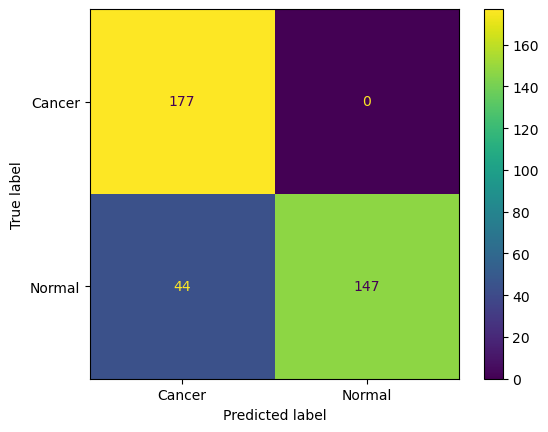

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generar predicciones en el conjunto de pruebas
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred)  # Redondear a 0 o 1

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cancer', 'Normal'])
disp.plot()

Podemos ver que el modelo obtiene:
- 44 falsos positivos
- 0 falsos negativos
- 177 verdaderos positivos
- 147 verdaderos negativos

Es importante que los falsos negativos sean 0, es decir, que el modelo no determine que el paciente no tiene cáncer y realmente sí lo tenga.

# Guardar el modelo en formato HDF5

Guardamos el modelo para reutilizarlo o ponerlo directamente en producción.

In [15]:
# Guardar el modelo en formato HDF5
model.save('modelo_con_gradcam.h5')
print("Modelo guardado como 'modelo_con_gradcam.h5'")

Modelo guardado como 'modelo_con_gradcam.h5'


# Próximos pasos

Podría intentar mejorar el recall para la clase "cáncer" (reduciendo falsos negativos) Y seguir optimizando el modelo:
- Evaluar interpretabilidad: Mejora del grad-CAM o técnicas similares para entender qué patrones usa el modelo.
- Aumentar datos: Si es posible, añade más datos reales para la clase "cáncer", ya que su recall aún tiene margen de mejora.
- Fine-tuning avanzado: Ajusta capas adicionales del modelo base y evalúa.